In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
#import the csv
df = pd.read_csv("wcb.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
#Cleaning the dataset + preprocessing
l = LabelEncoder()
l.fit(df['diagnosis'])
df['diagnosis'] = l.transform(df['diagnosis'])

X = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
Y = df['diagnosis'].values
Xnames = X.columns

In [4]:
#Reducing multicollinearity
final_features = [x for x in Xnames]
p = df[Xnames].corr().values.tolist()
for i in range(len(p)):
    for j in range(i+1, len(p)):
        if abs(p[i][j]) > 0.7 and Xnames[i] in final_features:
            final_features.remove(Xnames[i])
print("\n\nFeatures before removing multicollinearity: ", Xnames)
print("\n\nFeatures after removing multicollinearity:\n", final_features)



Features before removing multicollinearity:  Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')


Features after removing multicollinearity:
 ['symmetry_mean', 'texture_se', 'smoothness_se', 'concave points_se', 'symmetry_se', 'fractal_dimension_se', 'texture_worst', 'smoothness_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']


In [5]:
# Outlier Treatment
def outlier_treatment(df, feature):
    q1, q3 = np.percentile(df[feature], [25, 75])
    IQR = q3 - q1 
    lower_range = q1 - (3 * IQR) 
    upper_range = q3 + (3 * IQR)
    to_drop = df[(df[feature]<lower_range)|(df[feature]>upper_range)]
    df.drop(to_drop.index, inplace=True)

outlier_treatment(df, 'diagnosis')

In [6]:
#Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [7]:
def sigmoid(Z):
    Z = np.array(Z, dtype='float64')
    return 1/(1 + np.exp(-Z))

def logisticRegression(X, Y, learningRate):
    X = np.vstack((np.ones((X.shape[0],)), X.T)).T
    wT=np.zeros((X.shape[1], 1)).T
    costs = []
    for i in range(1000):
        wTx = np.dot(wT, X.T)
        A = sigmoid(wTx)
        wPred = np.array([1 if x >= 0.5 else 0 for x in A[0]])
        costs.append(np.sum(np.square(wPred - Y)))
        dW = np.dot(X.T, (wPred - Y)) / (Y.size)
        # dW = (1/X.shape[1]) * np.dot(X, (A - Y).T)
        wT = wT - learningRate * dW
    return wT, np.array(costs)

In [8]:
W, costs = logisticRegression(X_train, Y_train, 0.01)

C:\Users\Jass\AppData\Local\Temp\ipykernel_12924\1068587771.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


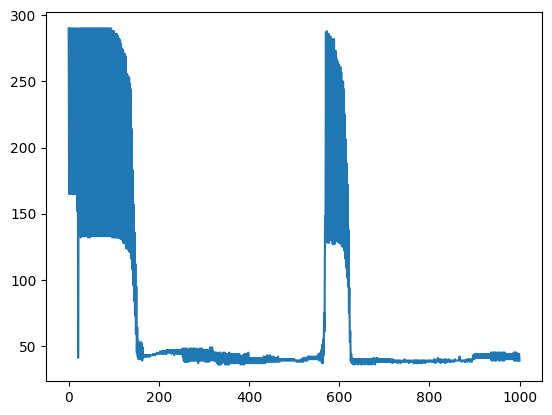

In [9]:
#Plotting the cost function
plt.plot(np.linspace(0, 1000, 1000), costs)

In [10]:
def predict(X, Y, W):
    X = np.vstack((np.ones((X.shape[0],)), X.T)).T
    wTx = np.dot(W, X.T)
    A = sigmoid(wTx)
    wPred = np.array([1 if x >= 0.5 else 0 for x in A[0]])
    print("Accuracy: ", np.sum(wPred == Y)/Y.size)
    return wPred

In [11]:
def parseDiagnosis(x):
    return ["Malignant" if i == 0 else "Benign" for i in x]
parseDiagnosis(predict(X_test, Y_test, W))

Accuracy:  0.8596491228070176


C:\Users\Jass\AppData\Local\Temp\ipykernel_12924\1068587771.py:3: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-Z))


['Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Benign',
 'Malignant',
 'Benign',
 'Benign',
 'Malignant',
 'Malignant',
 'Benign',
 'Malignant',
 'Malignant',
 'Malignant',
 'Malignant',
 'Mal